<div class="alert alert-block alert-warning">
<font size="5">
<b>Important Notes</b></font><br>
<br>
<font size="4">
<ul>
  <li>File names should follow the format: HWX_StudentID_Name, where X is the assignment number.</li>
    <br>
  <li>Please upload it to NTHU eeclass and be awared of the deadline.</li>
    <br>
  <li>Late submissions are generally not accepted, and a late submission will result in a score of 0. If there are any special circumstances, please contact the instructor for clarification.</li>
    <br>
  <li>Plagiarism is strictly prohibited (whether copying from others, the internet, or books). If any references are used, they must be properly cited. Both the plagiarizer and the source of the plagiarism will receive a score of 0. Allowing someone else to copy your assignment is not helping but harming them.</li>
    <br>
  <li>Code should be written in the "Python Cell" below the question, with comments if needed. If responses to questions and interpretations of results are needed, they should be written in the "Markdown Cell" below the Python cell.</li>
</ul>
</font>
</div>

# 1. (20%) Plot a sphere.

(a) (10%) Using spherical coordinate, one could plot a sphere using plot_surface() function which we introduced in class. This can be done by setting grids based on $\theta$ and $\phi$. And then define $x$, $y$, and $z$ using the relation between Cartesian and spherical coordinates.  
$$x = rsin(\theta)cos(\phi) $$
$$y = rsin(\theta)sin(\phi) $$
$$z = rcos(\theta) $$
Note that, 
$$ 0 \le \theta \le \pi$$
$$ 0 \le \phi   \le 2\pi$$
$$ r > 0 $$

Your plot should fulfill the requirements below:
* The radius shall be 2.
* For $\theta$ and $\phi$, the spacing between grids should be $0.01\pi$
* cstride and rstride shall be 1.
* The color shall be red.
* The x, y, z axes shall have labels X, Y and Z, respectively.


You shall get something like:
<p align="center">
    <img src="https://i.imgur.com/RrlaeMV.png" width="700">
</p>

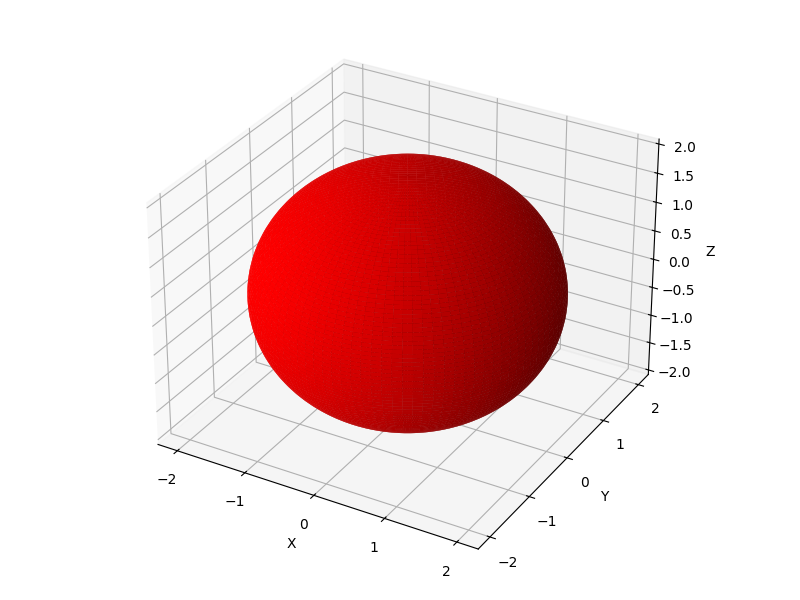

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set radius and create grid
r = 2
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Convert to Cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='r', edgecolor='none', rstride=1, cstride=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1, 2])

fig.tight_layout()
plt.show()


(b) (10%) **Sphere inside a sphere!**  
Now, based on the result you got from 1(a), plot another sphere with a radius 1 inside the sphere.  
Your plot should fulfill the requirements below:
* Define a function gen_sphere() which:
    * Takes r, N_theta, and N_phi (the number of grids in $\theta$ and $\phi$) as input arguments.
    * Return x, y and z meshpoints.
* Draw an outer and innere sphere using gen_sphere and plot_surface(), respectively.
* Outer sphere follows the format of red sphere from 1(a). You just need to change the alpha to 0.5 to make it more transparent.
* The inner sphere shall be:
    * r = 1 
    * blue color
    * cstride and rstride = 1.

You shall get something like:
<p align="center">
    <img src="https://i.imgur.com/gM8JrEz.png" width="700">
</p>

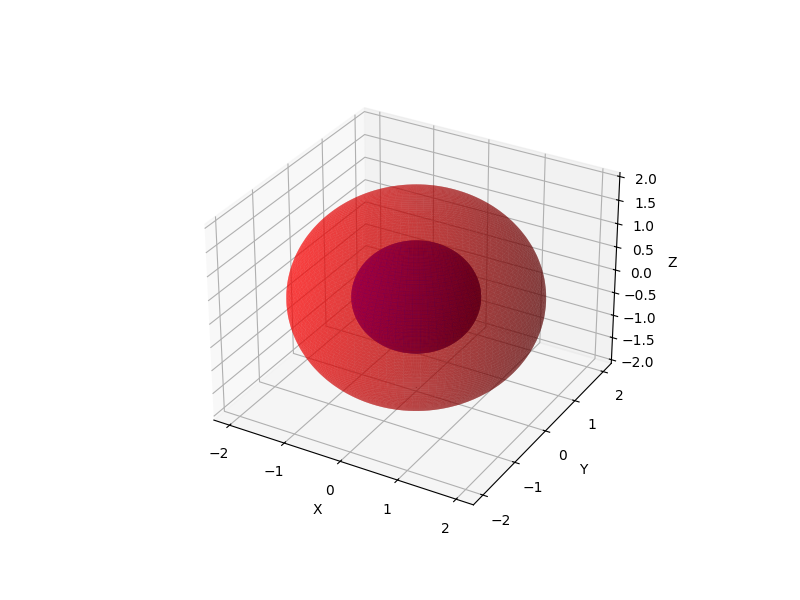

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gen_sphere(r, N_theta, N_phi):
    theta = np.linspace(0, np.pi, N_theta)
    phi = np.linspace(0, 2*np.pi, N_phi)
    theta, phi = np.meshgrid(theta, phi)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# outer sphere
x, y, z = gen_sphere(2, 100, 100) 
ax.plot_surface(x, y, z, color='r', edgecolor='none', rstride=1, cstride=1, alpha=0.5)

# inner sphere
x, y, z = gen_sphere(1, 100, 100) 
ax.plot_surface(x, y, z, color='b', edgecolor='none', rstride=1, cstride=1)  # Inner sphere is blue

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1, 2])

plt.show()


# 2. (60%) Generate the animation of the Monte Carlo dart shooting process
Remember that we used the Monte-Carlo approach (dart-shooting) process to find the value π in HW3. Now, we'd like to see this process in an animated manner.

(a) (10%) Learn how to make animated plot using matplotlib. You may search for any resources you'd like.  
Or you may refer to the tutorial below:  
https://steam.oxxostudio.tw/category/python/example/matplotlib-animation.html    
Please summarize your understanding in the markdown cell below.

1. 載入 matplotlib 的 animation 模組
    ```python
    import matplotlib.animation as animation
    ```

2. 使用 FuncAnimation() 
    ```python
    ani = animation.FuncAnimation(fig, func, frames, interval, init_func, repeat)
    ```
    - func：更新frame的函式
    - frames：更新的frame數量
    - interval：更新間隔時間 (ms)
    - init_func：初始化函式 (不一定要)
    
    需要實作的就是 func 和 init_func

    <補充> blit：優化動畫用，只更新有改變的部分

3. 存成GIF匯出
    ```python
    ani.save('file_name.gif', fps=60) 
    ```
    - fps: 調整想要的frame更新速度
    
    <補充> 也可以直接在output看動畫
    ```python
    from IPython.display import HTML
    HTML(ani.to_jshtml())
    ```
    

(b) (10%) Draw a circle and a square in the first qudrant.  
Your plot should fulfill the requirements below:
* The square is defined by four lines: x=0, x=1, y=0 and y=1, which should be red.
* The 1/4 circle should be Python default color.
* The axis label shall be x and y with a font size of 16.

You shall get something like this:  
<img src="https://i.imgur.com/tpf26Vr.png" width=500>

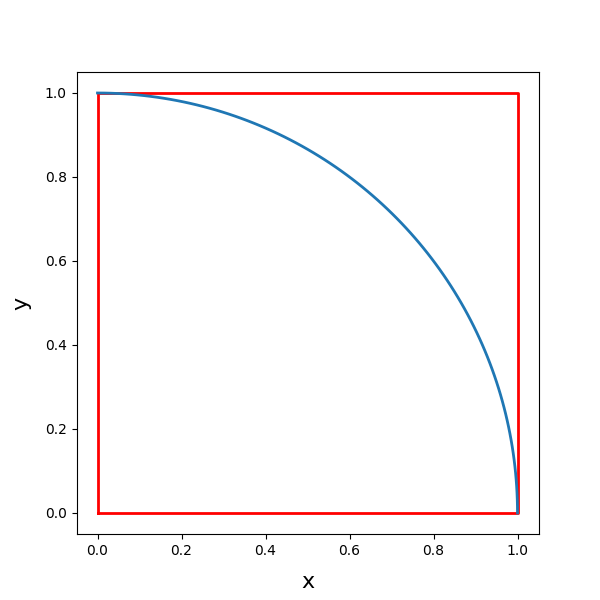

In [3]:
import numpy as np
import matplotlib.pyplot as plt

square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]

theta = np.linspace(0, np.pi/2, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

plt.figure(figsize=(6, 6))
plt.plot(square_x, square_y, 'r-', linewidth=2) 
plt.plot(circle_x, circle_y, linewidth=2)

plt.xlabel('x', fontsize=16, labelpad=10)
plt.ylabel('y', fontsize=16, labelpad=10)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()


(c) (20%) We can then generate a animated scatter plot. This is achieved by update each time we have a new scatter point in an iteration.  
Your plot should fulfill the requirements below:
* Generate 1000 scatter points in the animated plot.
* The scatter points shall be orange.
* Finally output a gjf file named "dart.gjf"

When you open the gjf using internet browser, it would look like:  
<img src="https://i.imgur.com/KTJutQA.gif" width=500>

MovieWriter ffmpeg unavailable; using Pillow instead.


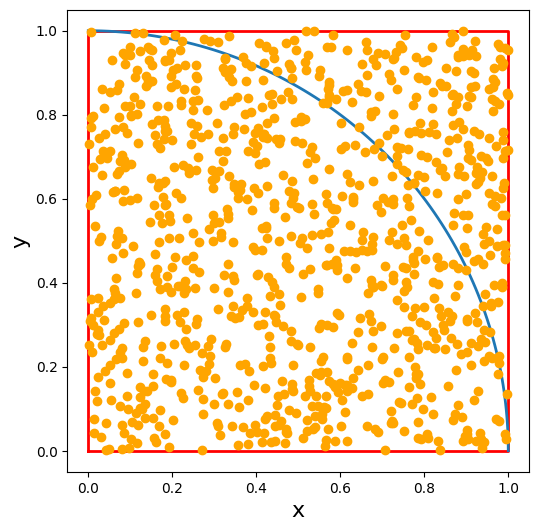

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]

theta = np.linspace(0, np.pi/2, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(square_x, square_y, 'r-', linewidth=2) 
ax.plot(circle_x, circle_y, linewidth=2)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)

# Setup scatter points
points, = ax.plot([], [], 'o', color='orange')
x, y = [], []

# initialize background
def init():
    points.set_data([], [])
    return points,

# update points for each frame
def update(frame):
    x.append(np.random.rand()) # generate points within [0, 1]
    y.append(np.random.rand())
    points.set_data(x, y)
    return points,

ani = FuncAnimation(fig, update, frames=1000, init_func=init, blit=True)

ani.save('dart.gif', fps=60)
# run for about 40s

(d) (20%) In addition to the animated shooting process, we can generate an animated plot of estimated pi vs number of attempts made.   
Your plot should fulfill the requirements below:
* Generate an animated plot of estimated pi value vs number of shots. 
* From 1 to 200 shots.
* The x and y axis label shall be "number of attempts made" and "estimated π", respectively.
* Finally output a gjf file named "pi.gjf"

When you open the gjf using internet browser, it would look like:  
<img src="https://i.imgur.com/dDItdsQ.gif" width=500>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

n = 200
x, y = [], []
pi_est = []

fig, ax = plt.subplots()
ax.set_xlim(0, n)
ax.set_ylim(0.0, 4.0)  
ax.set_xlabel('number of attempts made', fontsize=16)
ax.set_ylabel('estimated π', fontsize=16, labelpad=10)
line, = ax.plot([], [], 'o')

# initialize background
def init():
    line.set_data([], [])
    return line,

# update points for each frame
def update(frame):
    x.append(np.random.rand())
    y.append(np.random.rand())
    inside_circle = [(xp**2 + yp**2) <= 1 for xp, yp in zip(x, y)].count(True)
    ans = 4 * inside_circle / len(x)
    pi_est.append(ans)
    line.set_data(range(1, len(x) + 1), pi_est)
    return line,

ani = FuncAnimation(fig, update, frames=n, init_func=init, blit=True)

ani.save('pi.gif', fps=20)
# run for about 12s

# 3. (20%) Convergence analysis
Convergence analysis is a fundamental aspect of numerical methods and refers to the study of how the solution obtained using a numerical algorithm approaches the true solution as certain parameters, such as the step size or grid size, tend to zero or approach certain limiting values. In the class, we introduced three finite difference methods and derive their mathematical forms.

Make a convergence analysis plot of the three finite difference methods introduced in the class. Use the first derivative of sin(x) as a target.  
Your code should fulfill the requirements below:
* Define three functions forward(), backward(), and central() for forward difference, backward difference and central difference methods, respectively.
* These functions take f (the function), x0 (the point to estimate the first derivative), and h (the step size) as input. 
* These functions return the estimated first derivative at x0.
* Write a loop over h = 0.3, 0.1, 0.03, 0.01, 0.003, 0.001
* Calculate the error of sin(π/5) for each h.
* Make a log-log plot for error vs h.
* The x and y axis label shall be "h" and "Error" with a font size of 20, respectively.
* Frame thickness = 2
* For details of format, please refer to the figure below.

You shall get a plot like:   
<img src="https://i.imgur.com/yzA5v9C.png" width=500>

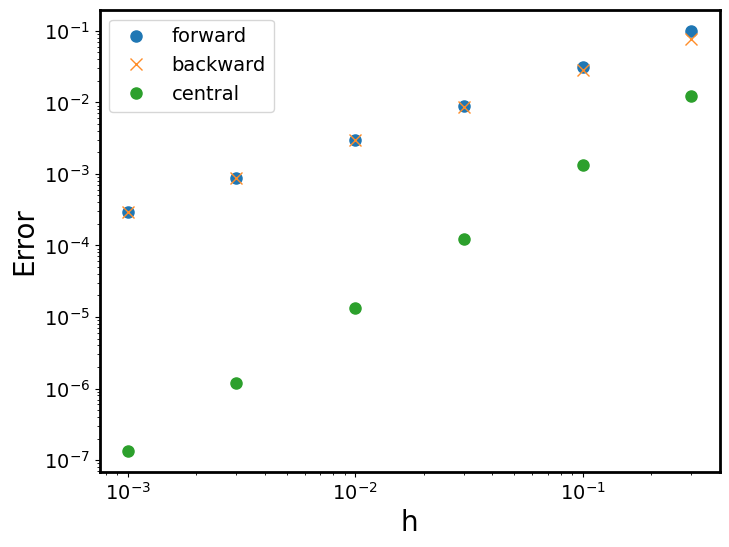

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# define the functions
def forward(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def backward(f, x0, h):
    return (f(x0) - f(x0 - h)) / h

def central(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

# inputs
f = np.sin
df = np.cos
x0 = np.pi / 5
hs = np.array([0.3, 0.1, 0.03, 0.01, 0.003, 0.001])

# calculate errors
err_f = np.abs(df(x0) - np.array([forward(f, x0, h) for h in hs]))
err_b = np.abs(df(x0) - np.array([backward(f, x0, h) for h in hs]))
err_c = np.abs(df(x0) - np.array([central(f, x0, h) for h in hs]))

# plotting
plt.figure(figsize=(8, 6))
plt.loglog(hs, err_f, 'o', label='forward', color='#1f77b4', markersize='8')
plt.loglog(hs, err_b, 'x', label='backward', color='#ff8d29', markersize='8')
plt.loglog(hs, err_c, 'o', label='central', color='#2ca02c', markersize='8')

# formatting
plt.xlabel('h', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.legend(fontsize=14)
plt.grid(True, which="both", ls = " ")

plt.show()
